# Circulation patterns for individual reanalysis and their pattern correlations with the target patterns (multi-reanalysis average)

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import proplot as pplot
import cmaps
from scipy.stats import pearsonr
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.ticker as mtick
import seaborn as sns

pplot.rc['leftlabel.size'] = 15
pplot.rc['toplabel.size'] = 15

In [16]:
domain_lonlat = {
    'EAS':{'lon_min':90,'lon_max':130,'lat_min':30,'lat_max':60},
    'EU':{'lon_min':10,'lon_max':50,'lat_min':35,'lat_max':65},
    'WNA':{'lon_min':220,'lon_max':260,'lat_min':25,'lat_max':55},
}
fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/figure_res/'

## draw 4*1 SOM grid for 3 reanalysis

In [17]:
## decide the SOM pattern pairs among three reanalyses, refer to era5
def patt_pair(domain):
    som_pattern_wb = pd.read_excel('/Users/zeqinhuang/Documents/paper/HWdna/procData/som_pattern_grid_4-1_historical_'+domain+'.xlsx',index_col=0,sheet_name=None)
    cls_refer_era5 = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'],index=som_pattern_wb.keys())
    cls_refer_era5_corr = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'],index=som_pattern_wb.keys())

    for d in som_pattern_wb.keys():
        som_pattern_dataset = som_pattern_wb[d]
        for c in som_pattern_dataset.columns:
            patt_corr_with_era5_0 = som_pattern_wb['era5']['grid:0-0'].corr(som_pattern_dataset[c])
            patt_corr_with_era5_1 = som_pattern_wb['era5']['grid:1-0'].corr(som_pattern_dataset[c])
            patt_corr_with_era5_2 = som_pattern_wb['era5']['grid:2-0'].corr(som_pattern_dataset[c])
            patt_corr_with_era5_3 = som_pattern_wb['era5']['grid:3-0'].corr(som_pattern_dataset[c])
            if max([patt_corr_with_era5_0,patt_corr_with_era5_1,patt_corr_with_era5_2,patt_corr_with_era5_3]) == patt_corr_with_era5_0:
                cls_refer_era5.loc[d][c] = 0
                cls_refer_era5_corr.loc[d][c] = patt_corr_with_era5_0
            elif max([patt_corr_with_era5_0,patt_corr_with_era5_1,patt_corr_with_era5_2,patt_corr_with_era5_3]) == patt_corr_with_era5_1:
                cls_refer_era5.loc[d][c] = 1
                cls_refer_era5_corr.loc[d][c] = patt_corr_with_era5_1
            elif max([patt_corr_with_era5_0,patt_corr_with_era5_1,patt_corr_with_era5_2,patt_corr_with_era5_3]) == patt_corr_with_era5_2:
                cls_refer_era5.loc[d][c] = 2
                cls_refer_era5_corr.loc[d][c] = patt_corr_with_era5_2
            else:
                cls_refer_era5.loc[d][c] = 3
                cls_refer_era5_corr.loc[d][c] = patt_corr_with_era5_3

    som_pattern_reanalyses = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'])
    for c in range(len(som_pattern_reanalyses.columns)):
        pair_col_era5 = cls_refer_era5.columns[(cls_refer_era5.loc['era5']==c)][0]
        pair_col_ncep2 = cls_refer_era5.columns[(cls_refer_era5.loc['ncep2']==c)][0]
        pair_col_jra55 = cls_refer_era5.columns[(cls_refer_era5.loc['jra55']==c)][0]
        som_pattern_reanalyses.iloc[:,c] = (som_pattern_wb['era5'][pair_col_era5] + som_pattern_wb['ncep2'][pair_col_ncep2] + som_pattern_wb['jra55'][pair_col_jra55]) / 3

    ## update pattern correlation with reanalyses average instead of era5
    cls_refer_re = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'],index=som_pattern_wb.keys())
    cls_refer_re_corr = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'],index=som_pattern_wb.keys())
    cls_refer_re_corr_sig = pd.DataFrame(columns=['grid:0-0','grid:1-0','grid:2-0','grid:3-0'],index=som_pattern_wb.keys())

    for d in som_pattern_wb.keys():
        som_pattern_dataset = som_pattern_wb[d]
        for c in som_pattern_dataset.columns:
            patt_corr_with_re_0, patt_sig_with_re_0 = pearsonr(som_pattern_reanalyses['grid:0-0'],som_pattern_dataset[c])
            patt_corr_with_re_1, patt_sig_with_re_1 = pearsonr(som_pattern_reanalyses['grid:1-0'],som_pattern_dataset[c])
            patt_corr_with_re_2, patt_sig_with_re_2 = pearsonr(som_pattern_reanalyses['grid:2-0'],som_pattern_dataset[c])
            patt_corr_with_re_3, patt_sig_with_re_3 = pearsonr(som_pattern_reanalyses['grid:3-0'],som_pattern_dataset[c])
            if max([patt_corr_with_re_0,patt_corr_with_re_1,patt_corr_with_re_2,patt_corr_with_re_3]) == patt_corr_with_re_0:
                cls_refer_re.loc[d][c] = 0
                cls_refer_re_corr.loc[d][c] = patt_corr_with_re_0
                cls_refer_re_corr_sig.loc[d][c] = patt_sig_with_re_0
            elif max([patt_corr_with_re_0,patt_corr_with_re_1,patt_corr_with_re_2,patt_corr_with_re_3]) == patt_corr_with_re_1:
                cls_refer_re.loc[d][c] = 1
                cls_refer_re_corr.loc[d][c] = patt_corr_with_re_1
                cls_refer_re_corr_sig.loc[d][c] = patt_sig_with_re_1
            elif max([patt_corr_with_re_0,patt_corr_with_re_1,patt_corr_with_re_2,patt_corr_with_re_3]) == patt_corr_with_re_2:
                cls_refer_re.loc[d][c] = 2
                cls_refer_re_corr.loc[d][c] = patt_corr_with_re_2
                cls_refer_re_corr_sig.loc[d][c] = patt_sig_with_re_2
            else:
                cls_refer_re.loc[d][c] = 3
                cls_refer_re_corr.loc[d][c] = patt_corr_with_re_3
                cls_refer_re_corr_sig.loc[d][c] = patt_sig_with_re_3

    return som_pattern_reanalyses,cls_refer_re, cls_refer_re_corr,cls_refer_re_corr_sig

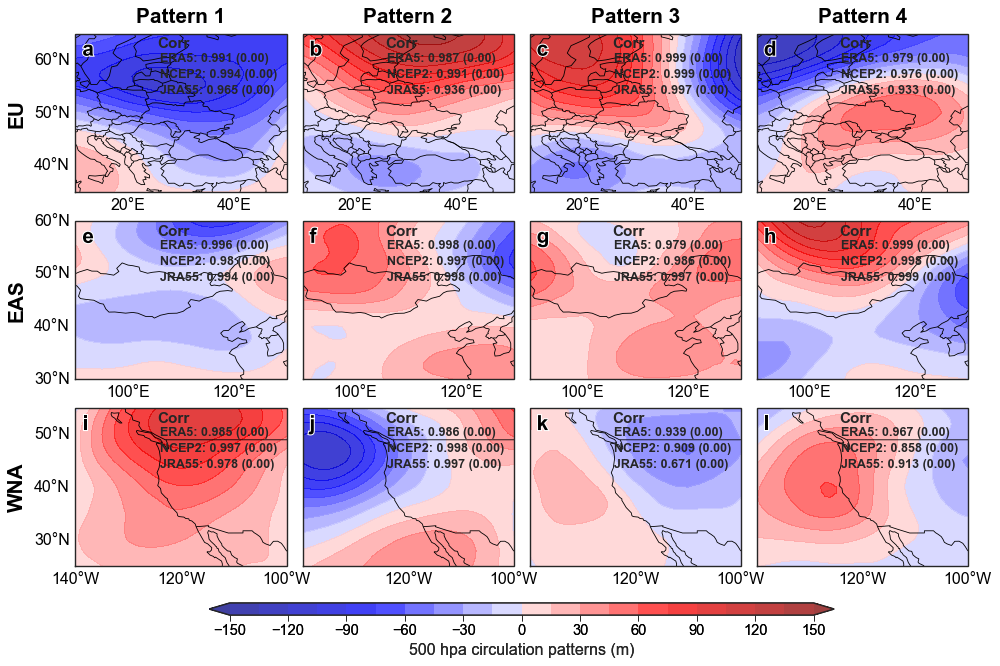

In [18]:
proj = pplot.Proj('pcarree', lon_0=180)
n_grid = 4 # 4 grids
m_region = 3 # 3 region
regions = ['EU','EAS','WNA']

fig, ax = pplot.subplots(ncols = n_grid, nrows = m_region,wspace=(1,1,1),hspace=(1.8,1.8),proj = proj,width = 10)
levels = [-150 + 15 * i for i in range(21)]
cmap1 = cmaps.BlRe

for m in range(m_region):
    domain = regions[m]
    som_pattern_reanalyses,cls_refer_re,cls_refer_re_corr,cls_refer_re_corr_sig = patt_pair(domain)
    lon = np.arange(domain_lonlat[domain]['lon_min'],domain_lonlat[domain]['lon_max']+1,1)
    lat = np.arange(domain_lonlat[domain]['lat_min'],domain_lonlat[domain]['lat_max']+1,1)
    for n in range(n_grid):
        dat_n_era5 = cls_refer_re.columns[cls_refer_re.loc['era5']==n][0]
        dat_n_ncep2 = cls_refer_re.columns[cls_refer_re.loc['ncep2']==n][0]
        dat_n_jra55 = cls_refer_re.columns[cls_refer_re.loc['jra55']==n][0]
        som_mn_flatten =  som_pattern_reanalyses.iloc[:,n]
        som_mn_corr_era5 = cls_refer_re_corr.loc['era5'][dat_n_era5]
        som_mn_corr_sig_era5 = cls_refer_re_corr_sig.loc['era5'][dat_n_era5]
        som_mn_corr_ncep2 = cls_refer_re_corr.loc['ncep2'][dat_n_ncep2]
        som_mn_corr_sig_ncep2 = cls_refer_re_corr_sig.loc['ncep2'][dat_n_ncep2]
        som_mn_corr_jra55 = cls_refer_re_corr.loc['jra55'][dat_n_jra55]
        som_mn_corr_sig_jra55 = cls_refer_re_corr_sig.loc['jra55'][dat_n_jra55]
        som_mn = np.reshape(som_mn_flatten.to_list(),newshape=(len(lat),len(lon)),order='F')

        if round(som_mn_corr_sig_era5,2) == 0.0:
            sig_text_era5 = '0.00'
        else:
            sig_text_era5 = str(round(som_mn_corr_sig_era5,2))
        if round(som_mn_corr_sig_ncep2,2) == 0.0:
            sig_text_ncep2 = '0.00'
        else:
            sig_text_ncep2 = str(round(som_mn_corr_sig_ncep2,2))
        if round(som_mn_corr_sig_jra55,2) == 0.0:
            sig_text_jra55 = '0.00'
        else:
            sig_text_jra55 = str(round(som_mn_corr_sig_jra55,2))
        
        p1 = ax[m,n].contourf(lon,lat,som_mn,levels = levels, alpha=0.75, extend = 'both',cmap=cmap1)
        ax[m,n].text(0.39,0.89,s='Corr',horizontalalignment='left',verticalalignment='bottom',transform = ax[m,n].transAxes,fontweight='bold',fontsize=11)
        cor_text_era5 = 'ERA5: ' + str(round(som_mn_corr_era5,3)) + ' (' + sig_text_era5 + ')\n'
        cor_text_ncep2 = 'NCEP2: ' + str(round(som_mn_corr_ncep2,3)) + ' (' + sig_text_ncep2 + ')\n'
        cor_text_jra55 = 'JRA55: ' + str(round(som_mn_corr_jra55,3)) + ' (' + sig_text_jra55 + ')\n'

        if som_mn_corr_sig_era5 < 0.01:
            ax[m,n].text(0.4,0.88,s=cor_text_era5,horizontalalignment='left',verticalalignment='top',transform = ax[m,n].transAxes,fontweight='bold',fontsize=9)
        else:
            ax[m,n].text(0.4,0.88,s=cor_text_era5,horizontalalignment='left',verticalalignment='top',transform = ax[m,n].transAxes,fontsize=9)
        if som_mn_corr_sig_ncep2 < 0.01:
            ax[m,n].text(0.4,0.78,s=cor_text_ncep2,horizontalalignment='left',verticalalignment='top',transform = ax[m,n].transAxes,fontweight='bold',fontsize=9)
        else:
            ax[m,n].text(0.4,0.78,s=cor_text_ncep2,horizontalalignment='left',verticalalignment='top',transform = ax[m,n].transAxes,fontsize=9)
        if som_mn_corr_sig_jra55 < 0.01:
            ax[m,n].text(0.4,0.68,s=cor_text_jra55,horizontalalignment='left',verticalalignment='top',transform = ax[m,n].transAxes,fontweight='bold',fontsize=9)
        else:
            ax[m,n].text(0.4,0.68,s=cor_text_jra55,horizontalalignment='left',verticalalignment='top',transform = ax[m,n].transAxes,fontsize=9)

        if n != 0:
            ax[m,n].format(lonlim=(lon[0],lon[-1]+0.01), latlim=(lat[0]-0.01,lat[-1]+0.01),
                            coast=True, borders=True, latlabels=False, lonlabels=True, lonlines=20, latlines=10)
        else:
            ax[m,n].format(lonlim=(lon[0]-0.01,lon[-1]+0.01), latlim=(lat[0]-0.01,lat[-1]+0.01),
                            coast=True, borders=True, latlabels=True, lonlabels=True, lonlines=20, latlines=10)

ax.format(abc = 'a', abcloc='ul', abcsize=15,tickdir='inout', toplabels = ('Pattern 1','Pattern 2','Pattern 3','Pattern 4'),leftlabels = ('EU','EAS','WNA'))
# ax.format(toplabelsize=20,leftlabelsize=15)
fig.colorbar(p1,loc='b',width='0.75em',length=0.7,label='500 hpa circulation patterns (m)')                         

## draw 4*1 SOM grid for individual reanalysis

In [19]:
def get_som_pattern(dataset,domain):
    som_pattern_wb = pd.read_excel('/Users/zeqinhuang/Documents/paper/HWdna/procData/som_pattern_grid_4-1_historical_'+domain+'.xlsx',index_col=0,sheet_name=None)
    dat_patterns = som_pattern_wb[dataset]
    return dat_patterns

In [20]:
proj = pplot.Proj('pcarree', lon_0=180)
n_grid = 4 # 4 grids
m_region = 3 # 3 region
regions = ['EU','EAS','WNA']

def plot_patterns(dataset,fig_name=None):
    fig, ax = pplot.subplots(ncols = n_grid, nrows = m_region,wspace=(1,1,1),hspace=(1.8,1.8),proj = proj,width = 10)
    levels = [-150 + 15 * i for i in range(21)]
    cmap1 = cmaps.BlRe

    for m in range(m_region):
        domain = regions[m]
        som_pattern_reanalyses,cls_refer_re,cls_refer_re_corr,cls_refer_re_corr_sig = patt_pair(domain)
        dat_patterns = get_som_pattern(dataset,domain)
        lon = np.arange(domain_lonlat[domain]['lon_min'],domain_lonlat[domain]['lon_max']+1,1)
        lat = np.arange(domain_lonlat[domain]['lat_min'],domain_lonlat[domain]['lat_max']+1,1)
        for n in range(n_grid):
            dat_n = cls_refer_re.columns[cls_refer_re.loc[dataset]==n][0]
            som_mn_flatten = dat_patterns[dat_n]
            som_mn_corr = cls_refer_re_corr.loc[dataset][dat_n]
            som_mn_corr_sig = cls_refer_re_corr_sig.loc[dataset][dat_n]
            som_mn = np.reshape(som_mn_flatten.to_list(),newshape=(len(lat),len(lon)),order='F')
            if round(som_mn_corr_sig,2) == 0.0:
                cor_text = 'Corr: '+ str(round(som_mn_corr,3)) + ' (0.00)'
            else:
                cor_text = 'Corr: '+ str(round(som_mn_corr,3)) + ' (' + str(round(som_mn_corr_sig,2)) + ')'
            p1 = ax[m,n].contourf(lon,lat,som_mn,levels = levels, alpha=0.75, extend = 'both',cmap=cmap1)
            ax[m,n].text(0.95,0.9,s=cor_text,horizontalalignment='right',verticalalignment='center',transform = ax[m,n].transAxes)
            if n != 0:
                ax[m,n].format(lonlim=(lon[0],lon[-1]+0.01), latlim=(lat[0]-0.01,lat[-1]+0.01),
                                coast=True, borders=True, latlabels=False, lonlabels=True, lonlines=20, latlines=10)
            else:
                ax[m,n].format(lonlim=(lon[0]-0.01,lon[-1]+0.01), latlim=(lat[0]-0.01,lat[-1]+0.01),
                                coast=True, borders=True, latlabels=True, lonlabels=True, lonlines=20, latlines=10)

    ax.format(abc = 'a', abcloc='ul', abcsize=15,tickdir='inout', toplabels = ('Pattern 1','Pattern 2','Pattern 3','Pattern 4'),leftlabels = ('EU','EAS','WNA'))
    # ax.format(toplabelsize=15,leftlabelsize=12)
    fig.colorbar(p1,loc='b',width='0.75em',length=0.7,label='500 hpa circulation patterns (m)') 

    if fig_name == None:
        pass
    else:
        fig.save(fig_dir + fig_name)                        
 

### ERA5

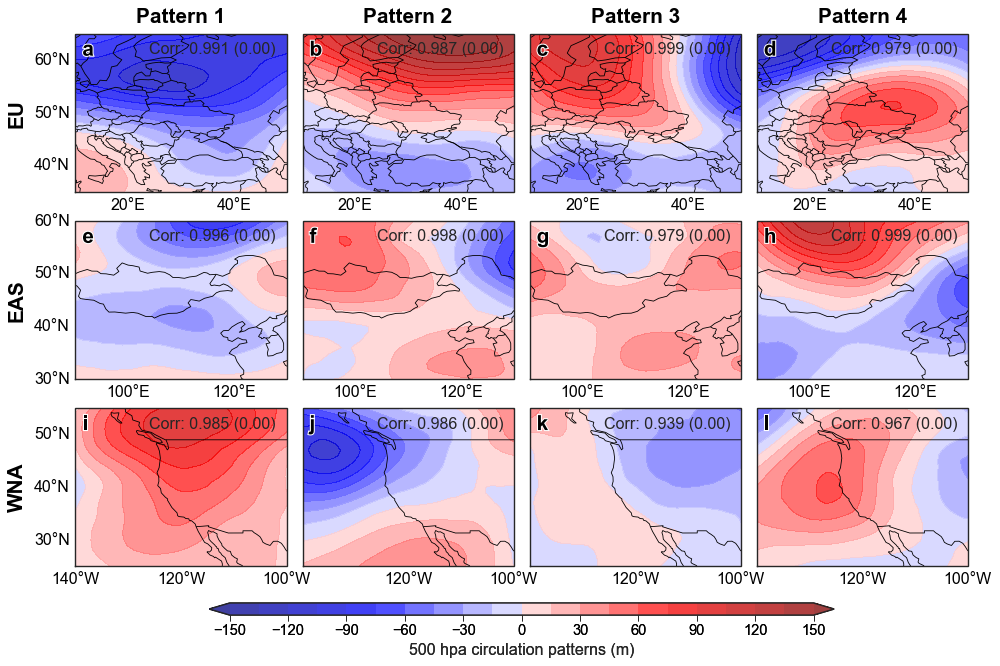

In [21]:
plot_patterns('era5','FigS3_circulation_patterns_categorization_era5.pdf')

### NCEP2

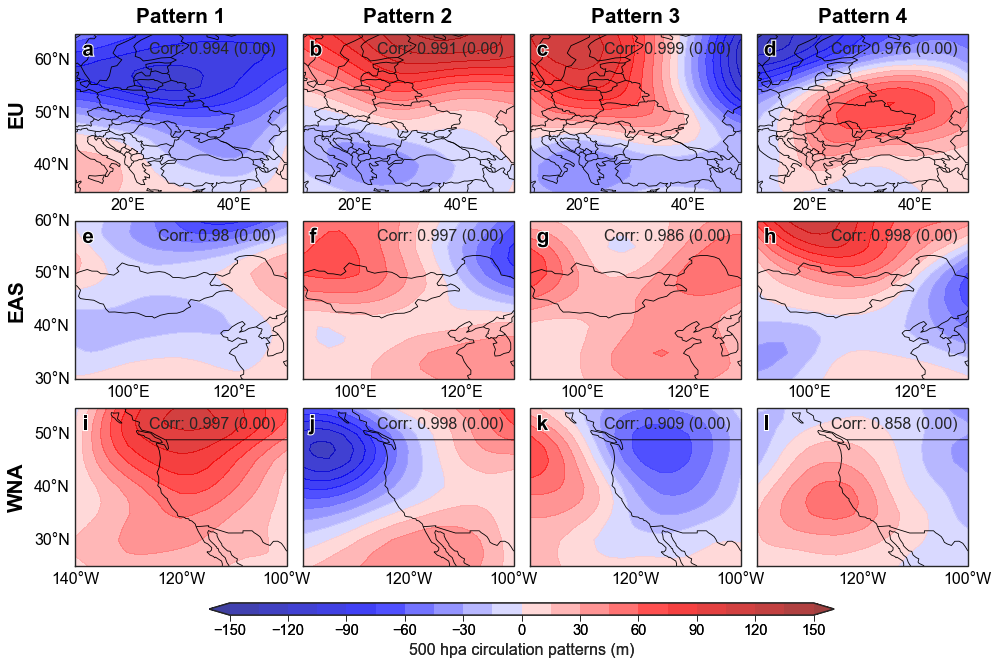

In [22]:
plot_patterns('ncep2','FigS5_circulation_patterns_categorization_ncep2.pdf')

### JRA55

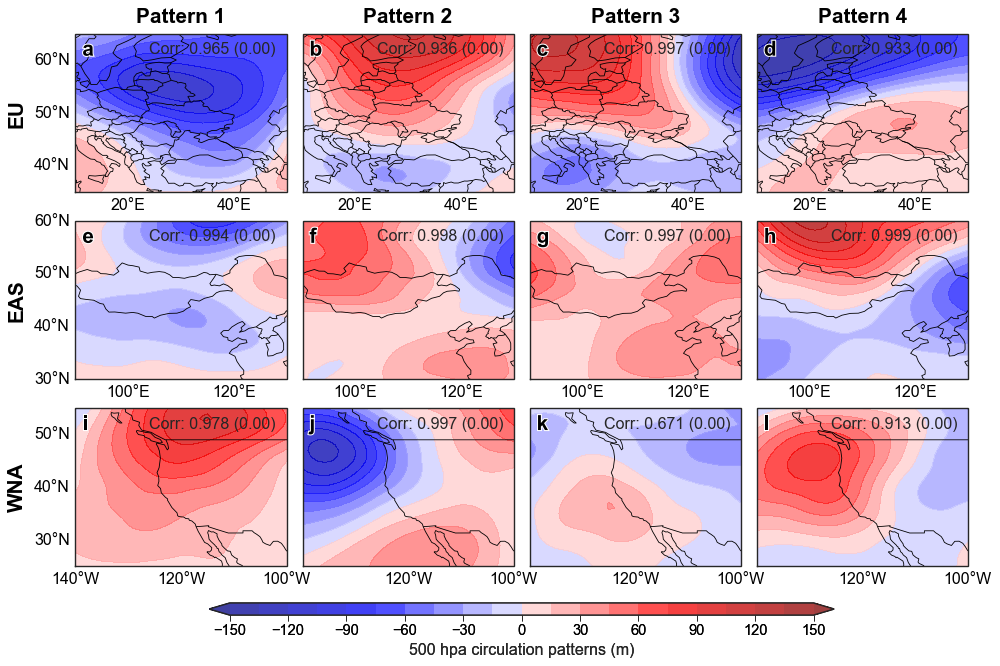

In [23]:
plot_patterns('jra55','FigS4_circulation_patterns_categorization_jra55.pdf')